In [1]:
%load_ext autoreload
%autoreload 1
%autosave 60

Autosaving every 60 seconds


In [2]:
import sys
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats
import glob, os
from matplotlib.patches import Rectangle

In [8]:
sys.path.append("../../../../scripts/python/")

In [10]:
import rnaseq
importlib.reload(rnaseq)

<module 'rnaseq' from '/u/davidm/Documents/Master-thesis/Scripts/RNA-seq/python/rnaseq/__init__.py'>

In [11]:
annot_path = "/home/arion/davidm/Data/references/human/assembly__GRCh38-hg38/annotation__gencode/gencode_34"

### Plotting parameters

In [12]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 110
plt.rcParams['font.family'] = 'DeJavu Serif'

In [19]:
panel = rnaseq.readwrite.read_raw(data_path="/home/arion/davidm/Data/datasets/raw/public/RNA-seq", project_id = "BC-Cell-Lines-Panel_GSE48213", quant_tool = "salmon", genref = "human/assembly__GRCh38-hg38/annotation__gencode/gencode_34", quant_params = "raw/pc-decoys-k31-1.4.0", exp = "bulk", samples = "all", layer="norm", cdna = "full length")
panel._inplace_subset_obs([s in ["T47D", "ZR751", "HCC70", "MCF7"] for s in panel.obs["samples"]])
rnaseq.pp.log_norm(panel, tot = 1e6)

/home/arion/davidm/Data/datasets/raw/public/RNA-seq/bulk/BC-Cell-Lines-Panel_GSE48213/quant/salmon/human/assembly__GRCh38-hg38/annotation__gencode/gencode_34/raw/pc-decoys-k31-1.4.0


/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Using BioMart Ensembl Genes 100 hsapiens_gene_ensembl for gene annotations.
Dataset already normalized.
Log2 + 1 tranformation...


In [165]:
x = pd.read_table("/home/arion/davidm/Data/datasets/private/RNA-seq/bulk/bulk-HCC70_DSP589/downloaded/quant/summary_genes_TPM.stranded.annotated.tsv")

samples = np.array(['HCC70-Ni-n1', 'HCC70-Ni-n2',
       'HCC70-Ni-n3', 'HCC70-sh-GRHL2-2-n1', 'HCC70-sh-GRHL2-2-n2',
       'HCC70-sh-GRHL2-2-n3', 'HCC70-sh-GRHL2-6-n1', 'HCC70-sh-GRHL2-6-n2',
       'HCC70-sh-GRHL2-6-n3', 'HCC70-sh-NT-n1', 'HCC70-sh-NT-n2',
       'HCC70-sh-NT-n3'])
mtx = np.log1p(x[samples].values.T)
genes = np.array([g.split(".")[0] for g in x["ID"]])
hcc70 = RNAseq.bulk_Dataset(mtx = mtx, samples = samples, genes = genes, cdna = "full length")
hcc70.log_norm_mtx = hcc70.mtx
hcc70.layers["full"].append("log_norm_mtx")

Annotating samples...


In [166]:
x = pd.read_table("/home/arion/davidm/Data/datasets/private/RNA-seq/bulk/bulk-436+231_DSP921/downloaded/quant/summary_genes_TPM.stranded.annotated.tsv")

samples = np.array(['MDA-MB-436-GRHL2-N1', 'MDA-MB-436-GRHL2-N2',
       'MDA-MB-436-Ni-N1', 'MDA-MB-436-Ni-N2', 'MDA-MB-436-pMIG-N1',
       'MDA-MB-436-pMIG-N2'])
mtx = np.log1p(x[samples].values.T)
genes = np.array([g.split(".")[0] for g in x["ID"]])
mdamb436 = RNAseq.bulk_Dataset(mtx = mtx, samples = samples, genes = genes, cdna = "full length")
mdamb436.log_norm_mtx = mdamb436.mtx
mdamb436.layers["full"].append("log_norm_mtx")

Annotating samples...


In [235]:
x.columns

Index(['gene_id', 'transcript_id(s)', 'MCF-7_pMIG-FlagCBP_N1',
       'MCF-7_pMIG-FlagCBP_N2', 'MCF-7_pMIG_N1', 'MCF-7_pMIG_N2',
       'T-47D_pMIG-FlagCBP_N1', 'T-47D_pMIG-FlagCBP_N2', 'T-47D_pMIG_N1',
       'T-47D_pMIG_N2', 'ZR-75_pMIG-FlagCBP_N1', 'ZR-75_pMIG-FlagCBP_N2',
       'ZR-75_pMIG_N1', 'ZR-75_pMIG_N2', 'ID', 'Name', 'Category', 'Location'],
      dtype='object')

In [236]:
x = pd.read_table("/home/arion/davidm/Data/datasets/private/RNA-seq/bulk/bulk-T47D-DSP1111/downloaded/quant/summary_genes_TPM.stranded.annotated.tsv")

samples = np.array(['MCF-7_pMIG-FlagCBP_N1','MCF-7_pMIG-FlagCBP_N2', 'MCF-7_pMIG_N1', 'MCF-7_pMIG_N2', 'T-47D_pMIG-FlagCBP_N1', 'T-47D_pMIG-FlagCBP_N2', 'T-47D_pMIG_N1', 'T-47D_pMIG_N2','ZR-75_pMIG-FlagCBP_N1', 'ZR-75_pMIG-FlagCBP_N2',
       'ZR-75_pMIG_N1', 'ZR-75_pMIG_N2'])
mtx = np.log1p(x[samples].values.T)
genes = np.array([g.split(".")[0] for g in x["ID"]])
t47d_1111 = RNAseq.bulk_Dataset(mtx = mtx, samples = samples, genes = genes, cdna = "full length")
t47d_1111.log_norm_mtx = t47d_1111.mtx
t47d_1111.layers["full"].append("log_norm_mtx")
t47d_1111.samples = np.array(['MCF7_pMIG-FlagCBP_N1','MCF7_pMIG-FlagCBP_N2', 'MCF7_pMIG_N1', 'MCF7_pMIG_N2', 'T47D_pMIG-FlagCBP_N1','T47D_pMIG-FlagCBP_N2', 'T47D_pMIG_N1', 'T47D_pMIG_N2','ZR75_pMIG-FlagCBP_N1', 'ZR75_pMIG-FlagCBP_N2',
       'ZR75_pMIG_N1', 'ZR75_pMIG_N2'])

Annotating samples...


In [226]:
x = pd.read_table("/home/arion/davidm/Data/datasets/private/RNA-seq/bulk/bulk-T47D-DSP550/downloaded/quant/summary_genes_TPM.stranded.annotated.tsv")

samples = np.array(['T47D-NT-36_n1', 'T47D-NT-37_n2', 'T47D-NT-38_n3',
       'T47D-pBABE-GRHL2-n1', 'T47D-pBABE-GRHL2-n2', 'T47D-pBABE-GRHL2-n3',
       'T47D-pBABE-n1', 'T47D-pBABE-n2', 'T47D-pBABE-n3', 'ZR75-NT-26_n1',
       'ZR75-NT-27_n2', 'ZR75-NT-28_n3', 'ZR75-pBABE-GRHL2-n1',
       'ZR75-pBABE-GRHL2-n2', 'ZR75-pBABE-GRHL2-n3', 'ZR75-pBABE-n1',
       'ZR75-pBABE-n2', 'ZR75-pBABE-n3'])
mtx = np.log1p(x[samples].values.T)
genes = np.array([g.split(".")[0] for g in x["ID"]])
t47d_550 = RNAseq.bulk_Dataset(mtx = mtx, samples = samples, genes = genes, cdna = "full length")
t47d_550.log_norm_mtx = t47d_550.mtx
t47d_550.layers["full"].append("log_norm_mtx")

Annotating samples...


In [225]:
x.columns

Index(['gene_id', 'transcript_id(s)', 'MDAMB436-NT_P14_n1',
       'MDAMB436-NT_P20_n2', 'MDAMB436-PMIG-GRHL2-n1',
       'MDAMB436-PMIG-GRHL2-n2', 'MDAMB436-PMIG-n1', 'MDAMB436-PMIG-n2',
       'T47D-NT-36_n1', 'T47D-NT-37_n2', 'T47D-NT-38_n3',
       'T47D-pBABE-GRHL2-n1', 'T47D-pBABE-GRHL2-n2', 'T47D-pBABE-GRHL2-n3',
       'T47D-pBABE-n1', 'T47D-pBABE-n2', 'T47D-pBABE-n3', 'ZR75-NT-26_n1',
       'ZR75-NT-27_n2', 'ZR75-NT-28_n3', 'ZR75-pBABE-GRHL2-n1',
       'ZR75-pBABE-GRHL2-n2', 'ZR75-pBABE-GRHL2-n3', 'ZR75-pBABE-n1',
       'ZR75-pBABE-n2', 'ZR75-pBABE-n3', 'ID', 'Name', 'Category', 'Location'],
      dtype='object')

In [179]:
samples = np.array(["NI_0","NI_E2","shER_1","shGFP","shNCOA2_1","shNCOA2_2","shNFYC_1","shNFYC_3","shNT"])
mtx = []
for s in samples :
    x = pd.read_table(f"/home/arion/davidm/Data/datasets/private/RNA-seq/bulk/bulk-T47D_DSP280/quant/star/human/assembly__GRCh38-hg38/annotation__gencode/gencode_37/raw/{s}/rsem.genes.results")
    mtx.append(x["TPM"].values)
genes = np.array([g.split(".")[0] for g in x["gene_id"]])
mtx = np.log1p(mtx)
t47d_280 = RNAseq.bulk_Dataset(mtx = mtx, samples = samples, genes = genes, cdna = "full length")
t47d_280.log_norm_mtx = t47d_280.mtx
t47d_280.layers["full"].append("log_norm_mtx")
t47d_280.samples = np.array(["T47D_"+s for s in t47d_280.samples])

Annotating samples...


In [238]:
lab = RNAseq.merge_datasets(list_datasets=[t47d_280, t47d_550, t47d_1111, hcc70, mdamb436], layer = "log_norm_mtx", annot_name="project", annot=["dsp280", "dsp550", "dsp1111", "dsp589", "dsp921"])

bulk = RNAseq.merge_datasets(list_datasets=[panel, lab], layer = "log_norm_mtx", annot_name="source", annot=["Daemen et al., 2013", "lab"])
# bulk.downsample(9900000)
bulk.save()

Annotating project...
Annotating samples...
Annotating source...
Annotating samples...


In [239]:
corr = pd.DataFrame(np.corrcoef(bulk.get_layer("log_norm_mtx")), index=bulk.source, columns=bulk.source)

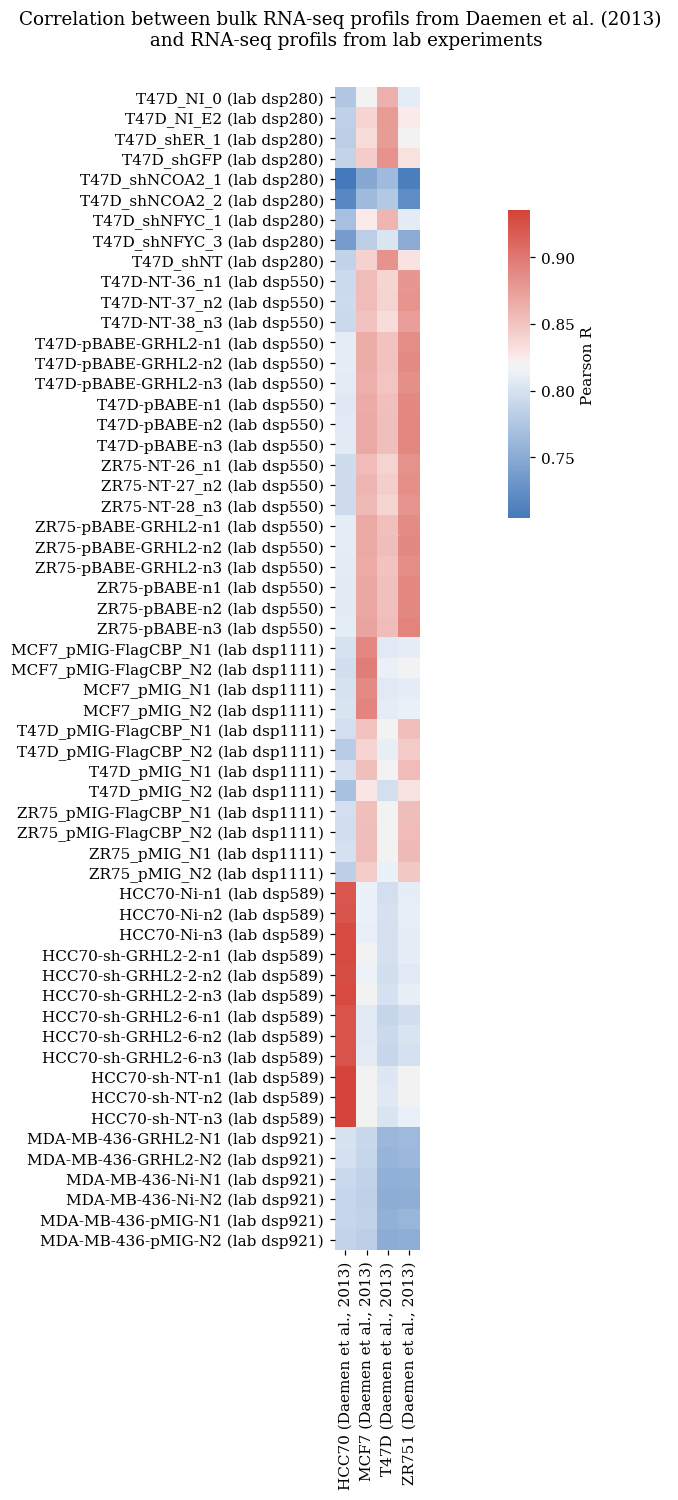

In [244]:
df = corr[["Daemen et al., 2013"]].loc[["lab"]]

fig, ax = plt.subplots(figsize=(1,14))
cmap = sb.diverging_palette(250, 14, as_cmap=True)
cbar_ax = fig.add_axes([1.7, .6, .2, 0.2])
g = sb.heatmap(df.values, cmap=cmap, ax = ax, cbar_ax=cbar_ax, cbar_kws={'label': 'Pearson R'}, xticklabels = [s + " (Daemen et al., 2013)" for s in panel.samples], yticklabels = [f"{s} (lab {p})" for s,p in zip(lab.samples, lab.project)])


# for r in row_label :
#     wanted_row = np.argwhere(df.index[g.dendrogram_row.reordered_ind] == r)
#     x, y, w, h  = (0, wanted_row, len(df.columns), 1)
#     g.ax_heatmap.add_patch(Rectangle((x, y), w, h, fill=False, edgecolor=b["T47D"], lw=3, clip_on=False))
#     g.ax_heatmap.tick_params(length=0)


# for c in col_label :
#     wanted_col = np.argwhere(df.columns[g.dendrogram_col.reordered_ind] == c)
#     x, y, w, h = (wanted_col, 0, 1, len(df.index))
#     g.ax_heatmap.add_patch(Rectangle((x, y), w, h, fill=False, edgecolor=b["T47D"], lw=3, clip_on=False))
#     g.ax_heatmap.tick_params(length=0)
                                      
                                      
plt.suptitle("Correlation between bulk RNA-seq profils from Daemen et al. (2013) \n and RNA-seq profils from lab experiments", fontsize=12, x = 0.2, y = 0.93);
plt.savefig("./CORR_bulk-lab_vs_bulk-Daemen.pdf")